In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get constraint for all genes and filter to target genes only

In [43]:
constraint_by_gene = pd.read_csv('../data/constraint/constraint_all_custom.txt.bgz',sep='\t',compression='gzip')
target_genes= pd.read_csv('../data/target_genes/target_gene_names_combined.csv',index_col=0)
constraint_by_target_gene = target_genes.merge(constraint_by_gene,left_on='symbol_Grch37',right_on='gene',how='left')
constraint_by_target_gene = constraint_by_target_gene[constraint_by_target_gene.canonical==True]
constraint_by_target_gene = constraint_by_target_gene[
    ['symbol','name','synonyms',
     'oe_lof','oe_lof_lower','oe_lof_upper','exp_lof',
     'oe_mis_pphen','oe_mis_pphen_lower','oe_mis_pphen_upper','exp_mis_pphen',
     'oe_mis_non_pphen','oe_mis_non_pphen_lower','oe_mis_non_pphen_upper','exp_mis_non_pphen']
]
constraint_by_target_gene.to_csv('../data/constraint/constraint_by_target_gene.csv')
constraint_by_target_gene.head()

,gene,transcript,canonical,obs_lof,exp_lof,oe_lof,oe_lof_lower,oe_lof_upper,obs_mis,exp_mis,...,oe_mis_pphen_lower,oe_mis_pphen_upper,obs_mis_non_pphen,exp_mis_non_pphen,oe_mis_non_pphen,oe_mis_non_pphen_lower,oe_mis_non_pphen_upper,pLI,pRec,pNull
0,A1BG,ENST00000263100,True,15.0,19.119000,0.78457,0.524,1.208,298.0,293.840,...,0.874,1.207,1226,1164.30,1.05300,1.004,1.104,4.991700e-09,0.38693,0.613070
1,A1BG,ENST00000600966,False,8.0,10.849000,0.73738,0.432,1.328,180.0,176.690,...,0.933,1.397,1239,1168.40,1.06040,1.011,1.111,3.741900e-05,0.61991,0.380060
2,A1CF,ENST00000282641,False,19.0,33.268000,0.57113,0.397,0.838,282.0,329.520,...,0.624,0.892,667,676.33,0.98620,0.925,1.051,3.439900e-09,0.98300,0.016997
3,A1CF,ENST00000373993,False,19.0,33.268000,0.57113,0.397,0.838,282.0,329.520,...,0.624,0.892,667,676.37,0.98615,0.925,1.051,3.439900e-09,0.98300,0.016997
4,A1CF,ENST00000373995,True,20.0,33.037000,0.60538,0.425,0.880,274.0,324.180,...,0.614,0.853,652,652.12,0.99982,0.937,1.067,5.921500e-10,0.95945,0.040546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80945,ZZZ3,ENST00000433749,False,0.0,1.481000,0.00000,0.000,1.560,22.0,34.236,...,0.351,0.832,322,378.45,0.85083,0.776,0.933,4.484600e-01,0.46033,0.091213
80946,hsa-mir-1199,ENST00000269720,True,6.0,9.226600,0.65029,0.355,1.281,102.0,153.190,...,0.507,0.912,209,296.02,0.70602,0.630,0.792,6.771200e-04,0.76045,0.238880
80947,hsa-mir-1199,ENST00000587086,False,2.0,4.318400,0.46314,0.188,1.411,59.0,74.035,...,0.494,0.938,214,302.89,0.70652,0.631,0.791,7.968500e-02,0.76602,0.154290
80948,hsa-mir-1199,ENST00000590772,False,3.0,4.081100,0.73509,0.329,1.695,40.0,58.473,...,NaN,NaN,240,338.96,0.70805,0.636,0.788,1.209900e-02,0.66118,0.326720


# Distribution of constraint

Need to adjust this to calculate log probability of observing this constraint under null hypothesis

In [7]:
(1 - constraint_by_target_gene['oe_lof']) / constraint_by_target_gene.exp_lof

0      0.022995
1      0.041155
2      0.084888
3     -0.018508
4      0.012037
         ...   
387    0.003914
388   -0.106444
389   -0.011794
390    0.010016
391    0.062333
Length: 392, dtype: float64

median constraint: 
 {'plof': 0.8421712515672247, 'damaging_missense': 1.1483346182021572, 'benign missense': 0.39392156715998394}


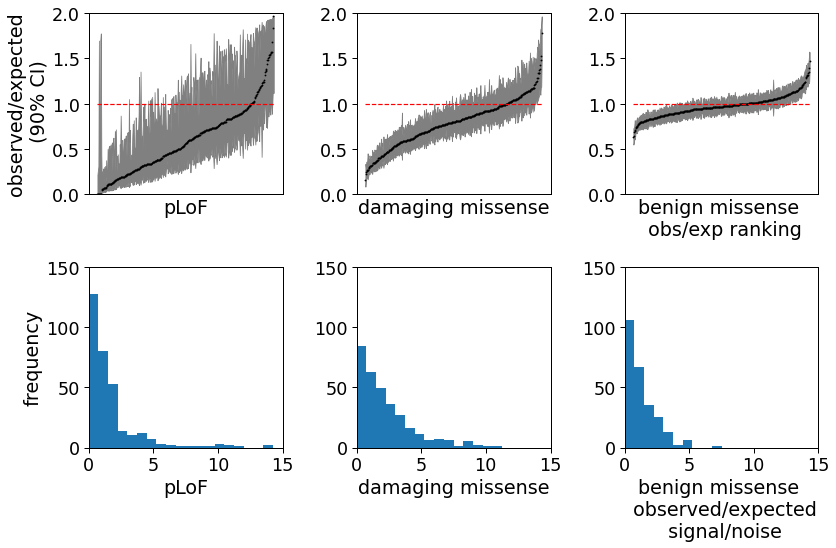

In [5]:
constraint_by_target_gene = pd.read_csv('../data/constraint/constraint_by_target_gene.csv')

constraint_by_target_gene['oe_lof_signal_noise']  = \
    (1 - constraint_by_target_gene['oe_lof']) / \
        (constraint_by_target_gene['oe_lof_upper'] - constraint_by_target_gene['oe_lof'])
constraint_by_target_gene['oe_mis_pphen_signal_noise']  = \
    (1 - constraint_by_target_gene['oe_mis_pphen']) / \
        (constraint_by_target_gene['oe_mis_pphen_upper'] - constraint_by_target_gene['oe_mis_pphen'])
constraint_by_target_gene['oe_mis_non_pphen_signal_noise']  = \
    (1 - constraint_by_target_gene['oe_mis_non_pphen']) / \
        (constraint_by_target_gene['oe_mis_non_pphen_upper'] - constraint_by_target_gene['oe_mis_non_pphen'])

median_signal_noise = {
    'plof':constraint_by_target_gene['oe_lof_signal_noise'].median(),
    'damaging_missense':constraint_by_target_gene['oe_mis_pphen_signal_noise'].median(),
    'benign missense':constraint_by_target_gene['oe_mis_non_pphen_signal_noise'].median()
}
 
print('median constraint: \n',median_signal_noise)

def plot_constraint_distribution(constraint, upper_bound, lower_bound, ax, title):
    constraint_ = constraint[np.logical_not(np.isnan(constraint))]
    upper_bound_ = upper_bound[np.logical_not(np.isnan(constraint))]
    lower_bound_ = lower_bound[np.logical_not(np.isnan(constraint))]
    constraint_order = np.argsort(constraint_)
    
    rank = np.arange(len(constraint_order))
    ax.fill_between(rank, lower_bound_[constraint_order], upper_bound_[constraint_order],color='grey')
    ax.scatter(rank, constraint_[constraint_order], color='black',s=1)
    ax.hlines(1, rank[0], rank[-1], 'r',linestyles='dashed')
    ax.set_xlabel(title)
    ax.set_ylim((0,2))
    ax.set_xticks([])
    return ax

sns.set_context('paper',font_scale=2)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(12,8))

plot_constraint_distribution(
    constraint_by_target_gene['oe_lof'].values, 
    constraint_by_target_gene['oe_lof_upper'].values, 
    constraint_by_target_gene['oe_lof_lower'].values, 
    ax1, 'pLoF'
)

plot_constraint_distribution(
    constraint_by_target_gene['oe_mis_pphen'].values, 
    constraint_by_target_gene['oe_mis_pphen_upper'].values, 
    constraint_by_target_gene['oe_mis_pphen_lower'].values, 
    ax2, 'damaging missense'
)

plot_constraint_distribution(
    constraint_by_target_gene['oe_mis_non_pphen'].values, 
    constraint_by_target_gene['oe_mis_non_pphen_upper'].values, 
    constraint_by_target_gene['oe_mis_non_pphen_lower'].values, 
    ax3, 'benign missense \n obs/exp ranking'
)


ax1.set_ylabel('observed/expected\n (90% CI)')
#ax3.set_xlabel('observed/expected\n ranking')


ax4.set_xlabel('pLoF')
ax4.hist(constraint_by_target_gene['oe_lof_signal_noise'],range=(0,15),bins=20)
for ax in (ax4, ax5, ax6):
    ax.set_ylim((0,150))
    ax.set_xlim(0,15)

ax4.set_ylabel('frequency')
ax5.set_xlabel('damaging missense')
ax5.hist(constraint_by_target_gene['oe_mis_pphen_signal_noise'],range=(0,15),bins=20)
ax6.set_xlabel('benign missense \n observed/expected\n signal/noise')
ax6.hist(constraint_by_target_gene['oe_mis_non_pphen_signal_noise'],range=(0,15),bins=20)
plt.tight_layout()
plt.savefig('../plots/constraint_distribution.png',dpi=600)

# Example constraint for different annotations for a target gene

This example is used in the methods schematic

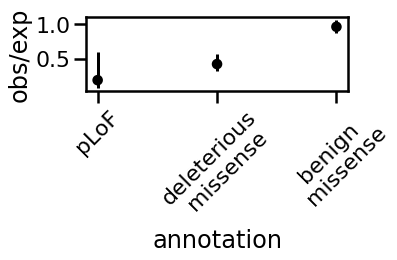

In [3]:
constraint_by_target_gene = pd.read_csv('../data/constraint/constraint_by_target_gene.csv')
example_constraint = constraint_by_target_gene[constraint_by_target_gene.symbol=='ADRB2']
example_constraint_df = pd.DataFrame(dict(annotation=['pLoF','deleterious\n missense','benign\n missense'],
     constraint=(example_constraint['oe_lof'].iloc[0],example_constraint['oe_mis_pphen'].iloc[0],example_constraint['oe_mis_non_pphen'].iloc[0]),
    constraint_upper=(example_constraint['oe_lof_upper'].iloc[0],example_constraint['oe_mis_pphen_upper'].iloc[0],example_constraint['oe_mis_non_pphen_upper'].iloc[0]),
    constraint_lower=(example_constraint['oe_lof_lower'].iloc[0],example_constraint['oe_mis_pphen_lower'].iloc[0],example_constraint['oe_mis_non_pphen_lower'].iloc[0]),))
sns.set_context('poster')
#colors=['#0f0f0f']
ax = sns.pointplot(data=example_constraint_df,x='annotation',y='constraint',color='k',ci=None,linestyles='none',scale=0.6)


x_coords = []
y_coords = []
for point_pair in ax.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)
errors = np.stack(
    (example_constraint_df['constraint'] - example_constraint_df['constraint_lower'],
     example_constraint_df['constraint_upper'] - example_constraint_df['constraint'])
)
plt.xticks(rotation=45)      
ax.errorbar(x=x_coords,y=y_coords,yerr=errors, color='k',fmt=' ', zorder=-1)
plt.tight_layout()
plt.ylabel('obs/exp')
plt.savefig('../plots/example_constraint_pointplot.png')

0.6544290114158028
0.444689698857315
0.6273446968101319


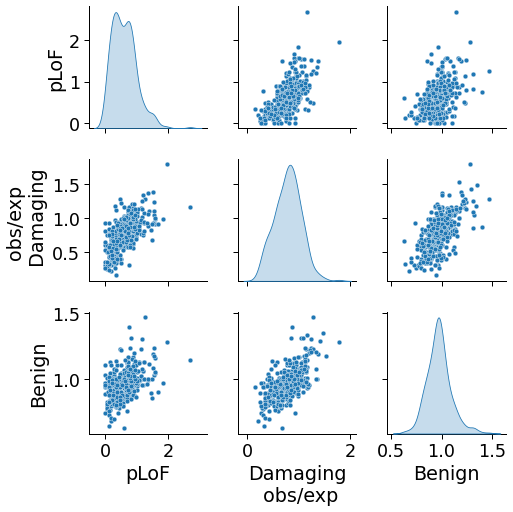

In [23]:
# Just to check (this can go in supplementary) - the measures of constraint are fairly strongly correlated
print(np.corrcoef(constraint_by_target_gene[['oe_mis_pphen','oe_lof']].dropna(),rowvar=False)[1,0])
print(np.corrcoef(constraint_by_target_gene[['oe_mis_non_pphen','oe_lof']].dropna(),rowvar=False)[1,0])
print(np.corrcoef(constraint_by_target_gene[['oe_mis_pphen','oe_mis_non_pphen']].values,rowvar=False)[1,0])

sns.set_context('paper',font_scale=2)


g = sns.pairplot(
    constraint_by_target_gene[['oe_lof','oe_mis_pphen','oe_mis_non_pphen']],
    diag_kind='kde',kind='scatter',
)
g.diag_sharey = True
labels = ['pLoF','obs/exp \n Damaging','Benign']
for ax, label in zip(g.axes[:,0],labels):
    ax.set_ylabel(label)
    
for ax, label in zip(g.axes[-1,:],labels):
    ax.set_xlabel(label)

g.axes[-1,1].set_xlabel('Damaging\n obs/exp')
    
plt.tight_layout()
plt.savefig('../plots/pairplot_point_estimates.png')

In [5]:
transcript_lengths = pd.read_csv('../data/Ensembl_gene_sequences/ensembl_all_gene_lengths.txt',sep='\t')
transcript_lengths = transcript_lengths[transcript_lengths['Gene type'] == 'protein_coding']

In [6]:
transcript_lengths.columns

Index(['Gene stable ID', 'Transcript length (including UTRs and CDS)',
       'Transcript stable ID', 'Gene type'],
      dtype='object')

(0.0, 700.0)

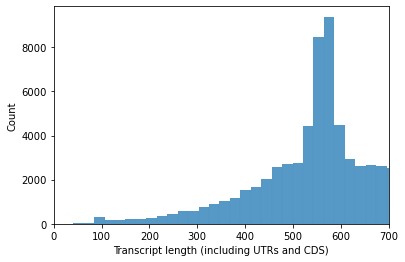

In [13]:
sns.histplot(data=transcript_lengths,x='Transcript length (including UTRs and CDS)',bins=5000)
plt.xlim(0,700)

In [18]:
transcript_lengths[
    (transcript_lengths['Transcript length (including UTRs and CDS)'] > 550) & \
    (transcript_lengths['Transcript length (including UTRs and CDS)'] < 580)
     ] 

,Gene stable ID,Transcript length (including UTRs and CDS),Transcript stable ID,Gene type
105,ENSG00000280663,572,ENST00000628846,protein_coding
110,ENSG00000280663,551,ENST00000631339,protein_coding
116,ENSG00000277334,568,ENST00000612744,protein_coding
228,ENSG00000263163,572,ENST00000574381,protein_coding
250,ENSG00000263309,576,ENST00000577464,protein_coding
...,...,...,...,...
258603,ENSG00000196154,566,ENST00000354332,protein_coding
258608,ENSG00000188015,579,ENST00000368712,protein_coding
258614,ENSG00000196754,556,ENST00000368707,protein_coding
258631,ENSG00000189171,579,ENST00000392623,protein_coding


(0.0, 2500.0)

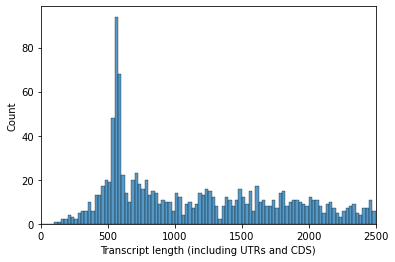

In [20]:
sns.histplot(
    data=transcript_lengths_with_annotated_gpcrs[transcript_lengths_with_annotated_gpcrs.is_GPCR_gene],
    x='Transcript length (including UTRs and CDS)',
    binrange=(0,2500), bins=100
)
plt.xlim(0,2500)

(0.0, 2500.0)

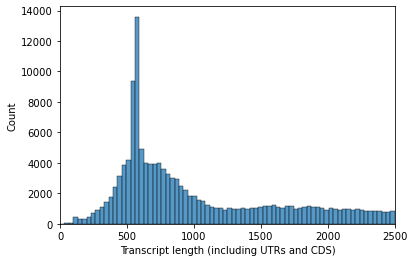

In [51]:
sns.histplot(
    data=transcript_lengths_with_annotated_gpcrs[~transcript_lengths_with_annotated_gpcrs.is_GPCR_gene],
    x='Transcript length (including UTRs and CDS)',
    binrange = (0,2500)
)
plt.xlim(0,2500)

In [28]:
transcript_lengths_with_annotated_gpcrs[transcript_lengths_with_annotated_gpcrs.is_GPCR_gene]

,Gene stable ID,Transcript length (including UTRs and CDS),Transcript stable ID,Gene type,Ensembl Id Grch38,is_GPCR_gene
10525,ENSG00000132975,4851,ENST00000405846,protein_coding,ENSG00000132975,True
10526,ENSG00000132975,1981,ENST00000381436,protein_coding,ENSG00000132975,True
12103,ENSG00000185231,3652,ENST00000327606,protein_coding,ENSG00000185231,True
12104,ENSG00000185231,576,ENST00000399821,protein_coding,ENSG00000185231,True
12676,ENSG00000171873,2942,ENST00000379453,protein_coding,ENSG00000171873,True
...,...,...,...,...,...,...
177268,ENSG00000143147,7806,ENST00000271357,protein_coding,ENSG00000143147,True
177269,ENSG00000143147,7655,ENST00000539777,protein_coding,ENSG00000143147,True
177270,ENSG00000143147,8256,ENST00000537209,protein_coding,ENSG00000143147,True
177271,ENSG00000143147,7815,ENST00000682931,protein_coding,ENSG00000143147,True


In [23]:
constraint_by_gene = pd.read_csv('../data/constraint/constraint_all_custom.txt.bgz',sep='\t',compression='gzip')
constraint_and_transcript_length_by_gene = \
    (constraint_by_gene
        .merge(transcript_lengths, left_on='transcript',right_on = 'Transcript stable ID')
        .merge(gpcr_ensembl_ids,left_on = 'Gene stable ID', right_on='Ensembl Id Grch38',how='left')
    )
constraint_and_transcript_length_by_gene['is_GPCR_gene'] = ~constraint_and_transcript_length_by_gene['Ensembl Id Grch38'].isna()
constraint_and_transcript_length_by_gene

,gene,transcript,canonical,obs_lof,exp_lof,oe_lof,oe_lof_lower,oe_lof_upper,obs_mis,exp_mis,...,oe_mis_non_pphen_upper,pLI,pRec,pNull,Gene stable ID,Transcript length (including UTRs and CDS),Transcript stable ID,Gene type,Ensembl Id Grch38,is_GPCR_gene
0,A1BG,ENST00000263100,True,15.0,19.1190,0.78457,0.524,1.208,298.0,293.840,...,1.104,4.991700e-09,0.38693,0.613070,ENSG00000121410,3382,ENST00000263100,protein_coding,NaN,False
1,A1BG,ENST00000600966,False,8.0,10.8490,0.73738,0.432,1.328,180.0,176.690,...,1.111,3.741900e-05,0.61991,0.380060,ENSG00000121410,917,ENST00000600966,protein_coding,NaN,False
2,A1CF,ENST00000282641,False,19.0,33.2680,0.57113,0.397,0.838,282.0,329.520,...,1.051,3.439900e-09,0.98300,0.016997,ENSG00000148584,9350,ENST00000282641,protein_coding,NaN,False
3,A1CF,ENST00000373993,False,19.0,33.2680,0.57113,0.397,0.838,282.0,329.520,...,1.051,3.439900e-09,0.98300,0.016997,ENSG00000148584,1997,ENST00000373993,protein_coding,NaN,False
4,A1CF,ENST00000373995,True,20.0,33.0370,0.60538,0.425,0.880,274.0,324.180,...,1.067,5.921500e-10,0.95945,0.040546,ENSG00000148584,2211,ENST00000373995,protein_coding,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72160,ZZZ3,ENST00000414381,False,0.0,1.2464,0.00000,0.000,1.645,15.0,23.832,...,0.934,4.215100e-01,0.47234,0.106160,ENSG00000036549,561,ENST00000414381,protein_coding,NaN,False
72161,ZZZ3,ENST00000433749,False,0.0,1.4810,0.00000,0.000,1.560,22.0,34.236,...,0.933,4.484600e-01,0.46033,0.091213,ENSG00000036549,603,ENST00000433749,protein_coding,NaN,False
72162,hsa-mir-1199,ENST00000269720,True,6.0,9.2266,0.65029,0.355,1.281,102.0,153.190,...,0.792,6.771200e-04,0.76045,0.238880,ENSG00000141854,1424,ENST00000269720,protein_coding,NaN,False
72163,hsa-mir-1199,ENST00000587086,False,2.0,4.3184,0.46314,0.188,1.411,59.0,74.035,...,0.791,7.968500e-02,0.76602,0.154290,ENSG00000141854,1535,ENST00000587086,protein_coding,NaN,False


(0.0, 100.0)

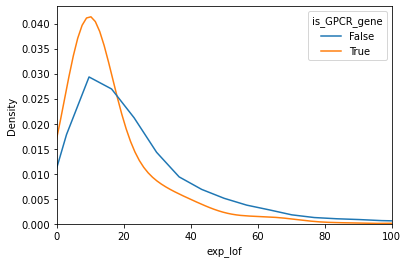

In [28]:
sns.kdeplot(data= constraint_and_transcript_length_by_gene[constraint_and_transcript_length_by_gene.canonical],x='exp_lof',hue='is_GPCR_gene',common_norm=False,cut=True)
plt.xlim((0,100))

In [33]:
constraint_by_gene_canon = constraint_and_transcript_length_by_gene[constraint_and_transcript_length_by_gene.canonical]
constraint_by_gene_canon.groupby('is_GPCR_gene').agg({'exp_lof':np.median, 'exp_mis':np.median, 'exp_mis_pphen':np.median})

,exp_lof,exp_mis,exp_mis_pphen
is_GPCR_gene,,,
False,18.9400,240.51,77.8745
True,10.5525,231.28,84.0490


In [35]:
constraint_by_gene_canon.groupby('is_GPCR_gene').agg({'exp_lof':lambda x: np.mean(x>10)})

,exp_lof
is_GPCR_gene,
False,0.740275
True,0.508108


(0.0, 500.0)

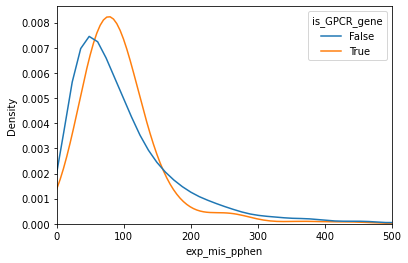

In [87]:
sns.kdeplot(data= constraint_and_transcript_length_by_gene[constraint_and_transcript_length_by_gene.canonical],x='exp_mis_pphen',hue='is_GPCR_gene',common_norm=False,cut=True)
plt.xlim((0,500))

In [70]:
gpcr_constraint = constraint_and_transcript_length_by_gene[constraint_and_transcript_length_by_gene.is_GPCR_gene].copy()
gpcr_constraint['is_lof_powered'] = gpcr_constraint['exp_lof']>10
gpcr_constraint[gpcr_constraint.canonical].is_lof_powered.mean()

0.5081081081081081

In [1]:
constraint_and_transcript_length_by_gene['is_lof_powered'] = constraint_and_transcript_length_by_gene['exp_lof']>10
constraint_and_transcript_length_by_gene[constraint_and_transcript_length_by_gene.canonical].is_lof_powered.mean()

NameError: name 'constraint_and_transcript_length_by_gene' is not defined

In [ ]:
constraint_and_by_gpcr = constraint_and_transcript_length_by_gene[constraint_and_transcript_length_by_gene.i]